In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

csv_file = 'star_solver_results_pitch_roll.csv'

In [2]:
# READ THE CSV FILE
pr_df = pd.read_csv(csv_file)
# use pitch-roll transform
tc_df = pr_df[ (pr_df['calc_succeeded']==True) &
               (pr_df['use_pitch_roll_transform']==True) &
               (pr_df['use_ahrs_calibration']==False) ]
# use AHRS calibration
ac_df = pr_df[ (pr_df['calc_succeeded']==True) &
               (pr_df['use_pitch_roll_transform']==False) &
               (pr_df['use_ahrs_calibration']==True) ]
# use neither correction
nc_df = pr_df[ (pr_df['calc_succeeded']==True) &
               (pr_df['use_pitch_roll_transform']==False) &
               (pr_df['use_ahrs_calibration']==False) ]


## Process "use pitch roll transform" entries

In [3]:
# [date, camera, lens, description]
pr = [ 'Flat_1', 'Flat_2','neg5el_1','neg5el_2', 'pos5el_1', 'pos5el_2' ]

# Select the rows with description as defined
i=0;
df0 = tc_df[ tc_df['description']==pr[i] ]
i=1;
df1 = tc_df[ tc_df['description']==pr[i] ]
i=2;
df2 = tc_df[ tc_df['description']==pr[i] ]
i=3;
df3 = tc_df[ tc_df['description']==pr[i] ]
i=4;
df4 = tc_df[ tc_df['description']==pr[i] ]
i=5;
df5 = tc_df[ tc_df['description']==pr[i] ]

In [4]:
# HEADING

df0_360 = df0['heading'] + 360
df0_360 %= 360
df1_360 = df1['heading'] + 360
df1_360 %= 360
df2_360 = df2['heading'] + 360
df2_360 %= 360
df3_360 = df3['heading'] + 360
df3_360 %= 360
df4_360 = df4['heading'] + 360
df4_360 %= 360
df5_360 = df5['heading'] + 360
df5_360 %= 360

y_e1 = abs(df0_360 - df0['true rotation'])
y_e2 = abs(df0_360 - df0['true rotation']-360)
err0 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df1_360 - df1['true rotation'])
y_e2 = abs(df1_360 - df1['true rotation']-360)
err1 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df2_360 - df2['true rotation'])
y_e2 = abs(df2_360 - df2['true rotation']-360)
err2 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df3_360 - df3['true rotation'])
y_e2 = abs(df3_360 - df3['true rotation']-360)
err3 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df4_360 - df4['true rotation'])
y_e2 = abs(df4_360 - df4['true rotation']-360)
err4 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df5_360 - df5['true rotation'])
y_e2 = abs(df5_360 - df5['true rotation']-360)
err5 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

# X,Y LISTS BEFORE PLOTTING

# make all same length
yarrs = [err0, err1, err2, err3, err4, err5]
ys = [y.shape[0] for y in yarrs]
maxlen = max(ys)
new_ys = []
for yarr in yarrs:
    thislen = yarr.shape[0]
    if thislen < maxlen:
        new_ys.append(np.array([x for x in yarr] + [np.nan for _ in range(maxlen-thislen)]))
    else:
        new_ys.append(yarr)

# THE "FALSE" y's ('use_center_px' = False)
ytc_0 = new_ys[0]
ytc_1 = new_ys[1]
ytc_2 = new_ys[2]
ytc_3 = new_ys[3]
ytc_4 = new_ys[4]
ytc_5 = new_ys[5]

xtc_h = np.array([i for i in range(maxlen)])
xtc_h = np.reshape(xtc_h,(maxlen,1))

## Process "use ahrs calibration" entries

In [5]:
# [date, camera, lens, description]
pr = [ 'Flat_1', 'Flat_2','neg5el_1','neg5el_2', 'pos5el_1', 'pos5el_2' ]

# Select the rows with description as defined
i=0;
df0 = ac_df[ ac_df['description']==pr[i] ]
i=1;
df1 = ac_df[ ac_df['description']==pr[i] ]
i=2;
df2 = ac_df[ ac_df['description']==pr[i] ]
i=3;
df3 = ac_df[ ac_df['description']==pr[i] ]
i=4;
df4 = ac_df[ ac_df['description']==pr[i] ]
i=5;
df5 = ac_df[ ac_df['description']==pr[i] ]

In [6]:
# HEADING

df0_360 = df0['heading'] + 360
df0_360 %= 360
df1_360 = df1['heading'] + 360
df1_360 %= 360
df2_360 = df2['heading'] + 360
df2_360 %= 360
df3_360 = df3['heading'] + 360
df3_360 %= 360
df4_360 = df4['heading'] + 360
df4_360 %= 360
df5_360 = df5['heading'] + 360
df5_360 %= 360

y_e1 = abs(df0_360 - df0['true rotation'])
y_e2 = abs(df0_360 - df0['true rotation']-360)
err0 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df1_360 - df1['true rotation'])
y_e2 = abs(df1_360 - df1['true rotation']-360)
err1 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df2_360 - df2['true rotation'])
y_e2 = abs(df2_360 - df2['true rotation']-360)
err2 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df3_360 - df3['true rotation'])
y_e2 = abs(df3_360 - df3['true rotation']-360)
err3 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df4_360 - df4['true rotation'])
y_e2 = abs(df4_360 - df4['true rotation']-360)
err4 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df5_360 - df5['true rotation'])
y_e2 = abs(df5_360 - df5['true rotation']-360)
err5 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

# X,Y LISTS BEFORE PLOTTING

# make all same length
yarrs = [err0, err1, err2, err3, err4, err5]
ys = [y.shape[0] for y in yarrs]
maxlen = max(ys)
new_ys = []
for yarr in yarrs:
    thislen = yarr.shape[0]
    if thislen < maxlen:
        new_ys.append(np.array([x for x in yarr] + [np.nan for _ in range(maxlen-thislen)]))
    else:
        new_ys.append(yarr)

# THE "FALSE" y's ('use_center_px' = False)
yac_0 = new_ys[0]
yac_1 = new_ys[1]
yac_2 = new_ys[2]
yac_3 = new_ys[3]
yac_4 = new_ys[4]
yac_5 = new_ys[5]

xac_h = np.array([i for i in range(maxlen)])
xac_h = np.reshape(xac_h,(maxlen,1))

## Process "use no correction" entries

In [7]:
# [date, camera, lens, description]
pr = [ 'Flat_1', 'Flat_2','neg5el_1','neg5el_2', 'pos5el_1', 'pos5el_2' ]

# Select the rows with description as defined
i=0;
df0 = nc_df[ nc_df['description']==pr[i] ]
i=1;
df1 = nc_df[ nc_df['description']==pr[i] ]
i=2;
df2 = nc_df[ nc_df['description']==pr[i] ]
i=3;
df3 = nc_df[ nc_df['description']==pr[i] ]
i=4;
df4 = nc_df[ nc_df['description']==pr[i] ]
i=5;
df5 = nc_df[ nc_df['description']==pr[i] ]

In [8]:
# HEADING

df0_360 = df0['heading'] + 360
df0_360 %= 360
df1_360 = df1['heading'] + 360
df1_360 %= 360
df2_360 = df2['heading'] + 360
df2_360 %= 360
df3_360 = df3['heading'] + 360
df3_360 %= 360
df4_360 = df4['heading'] + 360
df4_360 %= 360
df5_360 = df5['heading'] + 360
df5_360 %= 360

y_e1 = abs(df0_360 - df0['true rotation'])
y_e2 = abs(df0_360 - df0['true rotation']-360)
err0 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df1_360 - df1['true rotation'])
y_e2 = abs(df1_360 - df1['true rotation']-360)
err1 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df2_360 - df2['true rotation'])
y_e2 = abs(df2_360 - df2['true rotation']-360)
err2 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df3_360 - df3['true rotation'])
y_e2 = abs(df3_360 - df3['true rotation']-360)
err3 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df4_360 - df4['true rotation'])
y_e2 = abs(df4_360 - df4['true rotation']-360)
err4 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(df5_360 - df5['true rotation'])
y_e2 = abs(df5_360 - df5['true rotation']-360)
err5 = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

# X,Y LISTS BEFORE PLOTTING

# make all same length
yarrs = [err0, err1, err2, err3, err4, err5]
ys = [y.shape[0] for y in yarrs]
maxlen = max(ys)
new_ys = []
for yarr in yarrs:
    thislen = yarr.shape[0]
    if thislen < maxlen:
        new_ys.append(np.array([x for x in yarr] + [np.nan for _ in range(maxlen-thislen)]))
    else:
        new_ys.append(yarr)

# THE "FALSE" y's ('use_center_px' = False)
ync_0 = new_ys[0]
ync_1 = new_ys[1]
ync_2 = new_ys[2]
ync_3 = new_ys[3]
ync_4 = new_ys[4]
ync_5 = new_ys[5]

xnc_h = np.array([i for i in range(maxlen)])
xnc_h = np.reshape(xnc_h,(maxlen,1))

## Plot the heading results

9
9
9


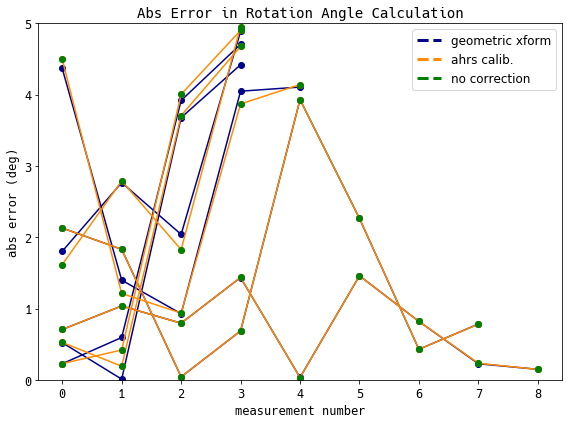

In [10]:
print(len(xtc_h))
print(len(xac_h))
print(len(xnc_h))

# PLOT CALCULATION ERROR
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)

# use transformation correction
ct = 'darkblue'
ax.plot(xtc_h, ytc_0, '-o', color=ct)
ax.plot(xtc_h, ytc_1, '-o', color=ct)
ax.plot(xtc_h, ytc_2, '-o', color=ct)
ax.plot(xtc_h, ytc_3, '-o', color=ct)
ax.plot(xtc_h, ytc_4, '-o', color=ct)
ax.plot(xtc_h, ytc_5, '-o', color=ct)

# use ahrs correction
ca = 'darkorange'
ax.plot(xac_h, yac_0, '-o', color=ca)
ax.plot(xac_h, yac_1, '-o', color=ca)
ax.plot(xac_h, yac_2, '-o', color=ca)
ax.plot(xac_h, yac_3, '-o', color=ca)
ax.plot(xac_h, yac_4, '-o', color=ca)
ax.plot(xac_h, yac_5, '-o', color=ca)

# use neither correction
cn = 'green'
ax.plot(xnc_h, ync_0, 'o', color=cn)
ax.plot(xnc_h, ync_1, 'o', color=cn)
ax.plot(xnc_h, ync_2, 'o', color=cn)
ax.plot(xnc_h, ync_3, 'o', color=cn)
ax.plot(xnc_h, ync_4, 'o', color=cn)
ax.plot(xnc_h, ync_5, 'o', color=cn)

########################################
colors = [ct,ca,cn]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['geometric xform', 'ahrs calib.', 'no correction']
ax.legend(lines, labels, fontsize=12)

#######################################
# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
########################################

ax.set_xlabel('measurement number', fontsize=12, fontname='hack')
#ax.set_xlim([0,8])
ax.set_ylabel('abs error (deg)', fontsize=12, fontname='hack')
ax.set_ylim([0,5])
#plt.legend(loc='upper center')
#plt.show()
plt.xticks(fontsize=12, fontname='hack', rotation=0)
plt.yticks(fontsize=12, fontname='hack', rotation=0)
plt.title('Abs Error in Rotation Angle Calculation', fontsize=14, fontname='hack')
plt.tight_layout()
plt.savefig('./heading_errors.png', bbox_inches='tight', pad_inches=0.1)
